Dataset Shape: (1460, 81)
Columns in Dataset: Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 

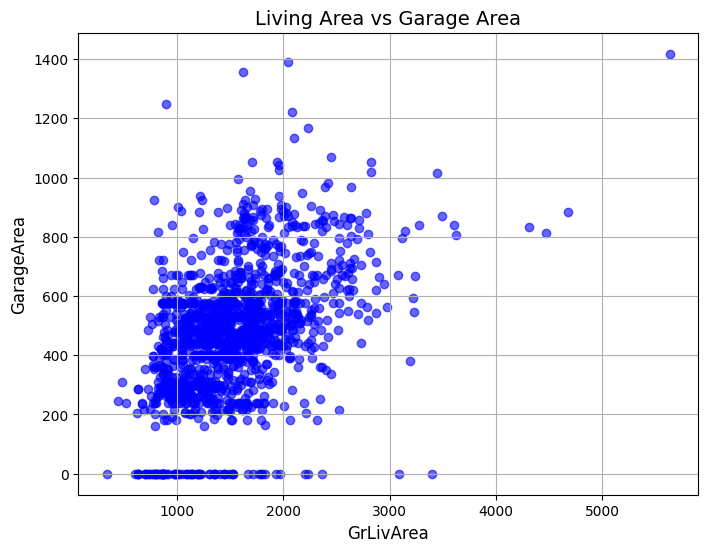

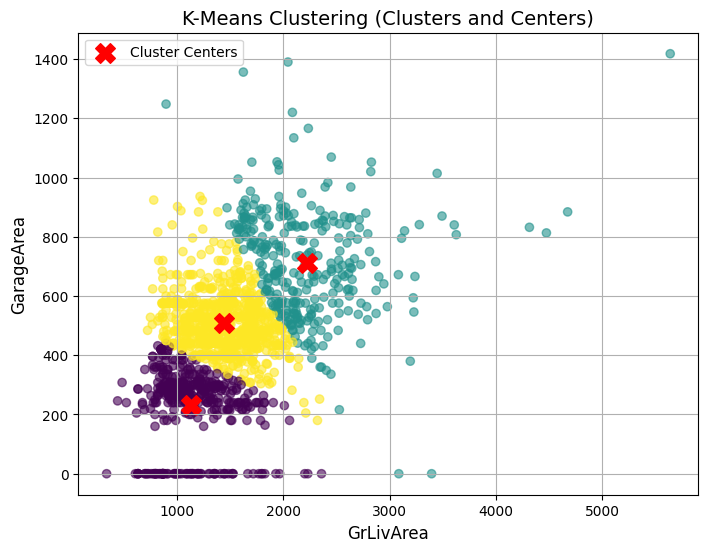

K-Means Silhouette Score: 0.35879925100899923


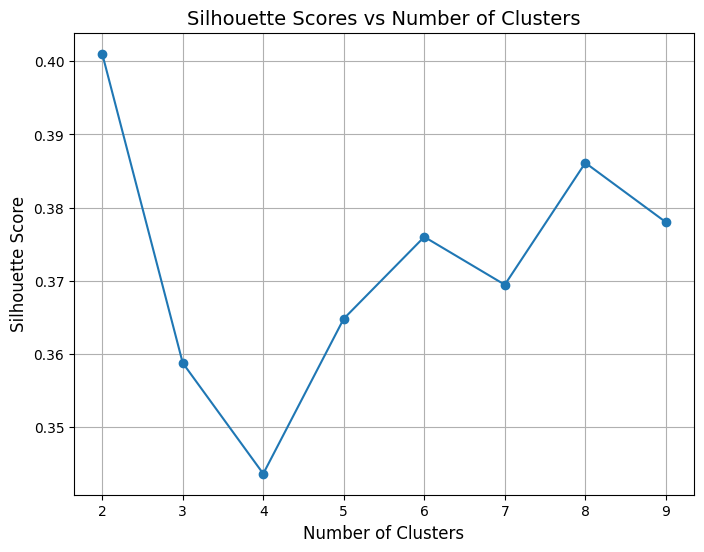

Optimal Number of Clusters for K-Means: 2


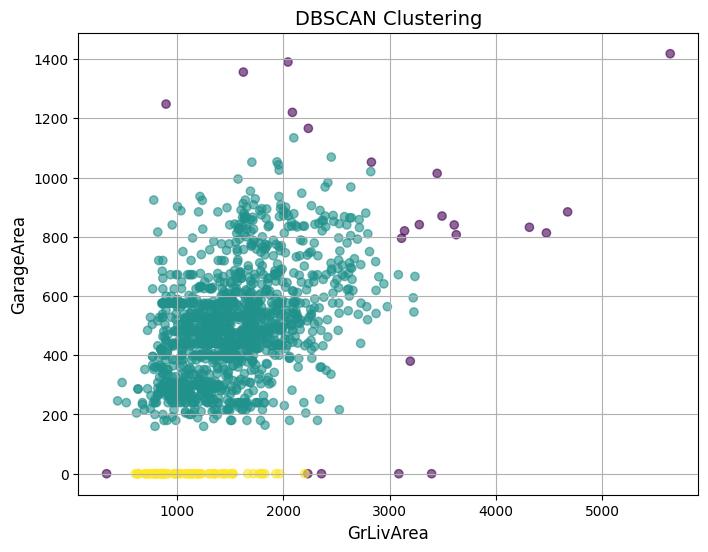

DBSCAN Silhouette Score: 0.37822062063513595

Performance Discussion:
- K-Means Clustering performed with a silhouette score of 0.35879925100899923
- DBSCAN formed 2 clusters.
- DBSCAN is better for datasets with irregularly shaped clusters, while K-Means assumes spherical clusters.


In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

# Task 1: Load and explore the dataset
file_path = r"C:\Users\S4 User\Required Assignment 18.2 Clustering with scikit-learn  [Rohit Sharma]\train.csv"  # Update this path as needed
housing_data = pd.read_csv(file_path)

# Inspect the dataset
print("Dataset Shape:", housing_data.shape)
print("Columns in Dataset:", housing_data.columns)
print("First 4 Rows of Data:\n", housing_data.head(4))

# Task 2: Extract the relevant variables
variables = ["GrLivArea", "GarageArea"]
data = housing_data[variables].dropna()  # Drop rows with missing values

# Visualize the 2D distribution of the selected variables
plt.figure(figsize=(8, 6))
plt.scatter(data["GrLivArea"], data["GarageArea"], alpha=0.6, color='blue')
plt.title("Living Area vs Garage Area", fontsize=14)
plt.xlabel("GrLivArea", fontsize=12)
plt.ylabel("GarageArea", fontsize=12)
plt.grid()
plt.show()

# Scale the data for clustering algorithms
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Task 3: Perform K-Means Clustering
# Guess the number of clusters from the scatter plot (e.g., 3)
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(data_scaled)
data['Cluster'] = kmeans.labels_

# Visualize the clusters
plt.figure(figsize=(8, 6))
plt.scatter(data["GrLivArea"], data["GarageArea"], c=data['Cluster'], cmap='viridis', alpha=0.6)
plt.scatter(scaler.inverse_transform(kmeans.cluster_centers_)[:, 0], scaler.inverse_transform(kmeans.cluster_centers_)[:, 1],
            s=200, c='red', label='Cluster Centers', marker='X')
plt.title("K-Means Clustering (Clusters and Centers)", fontsize=14)
plt.xlabel("GrLivArea", fontsize=12)
plt.ylabel("GarageArea", fontsize=12)
plt.legend()
plt.grid()
plt.show()

# Evaluate K-Means performance using silhouette score
silhouette_kmeans = silhouette_score(data_scaled, kmeans.labels_)
print("K-Means Silhouette Score:", silhouette_kmeans)

# Task 4: Tune the number of clusters and evaluate performance
silhouette_scores = []
k_values = range(2, 10)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(data_scaled)
    score = silhouette_score(data_scaled, kmeans.labels_)
    silhouette_scores.append(score)

# Plot silhouette scores vs number of clusters
plt.figure(figsize=(8, 6))
plt.plot(k_values, silhouette_scores, marker='o')
plt.title("Silhouette Scores vs Number of Clusters", fontsize=14)
plt.xlabel("Number of Clusters", fontsize=12)
plt.ylabel("Silhouette Score", fontsize=12)
plt.grid()
plt.show()

# Optimal number of clusters
optimal_k = k_values[np.argmax(silhouette_scores)]
print("Optimal Number of Clusters for K-Means:", optimal_k)

# Task 5: Perform DBSCAN Clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)  # Adjust parameters as needed
dbscan_labels = dbscan.fit_predict(data_scaled)
data['DBSCAN_Cluster'] = dbscan_labels

# Visualize DBSCAN clusters
plt.figure(figsize=(8, 6))
plt.scatter(data["GrLivArea"], data["GarageArea"], c=data['DBSCAN_Cluster'], cmap='viridis', alpha=0.6)
plt.title("DBSCAN Clustering", fontsize=14)
plt.xlabel("GrLivArea", fontsize=12)
plt.ylabel("GarageArea", fontsize=12)
plt.grid()
plt.show()

# Evaluate DBSCAN clustering performance
# Note: Silhouette score is only meaningful for clusters with more than one cluster
if len(set(dbscan_labels)) > 1:
    silhouette_dbscan = silhouette_score(data_scaled, dbscan_labels)
    print("DBSCAN Silhouette Score:", silhouette_dbscan)
else:
    print("DBSCAN did not form distinct clusters; silhouette score not applicable.")

# Task 6: Discuss performance differences
print("\nPerformance Discussion:")
print("- K-Means Clustering performed with a silhouette score of", silhouette_kmeans)
print("- DBSCAN formed", len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0), "clusters.")
print("- DBSCAN is better for datasets with irregularly shaped clusters, while K-Means assumes spherical clusters.")
